# Machine Learning Clustering with Scikit-Learn

<div class="alert alert-block alert-info">
  <b>THE TASK: </b> Using a clustering algorithm on UK historical weather data, would it be possible to cluster the different meteorological stations into groups that have “similar” weather? 

In terms of Machine Learning, we can describe this as an unsupervised clustering problem. That is an exploration for structure within the data.
</div>

##  Reading  the weather data, tidying and cleaning


We import some of the packages we are going to use. 

In [2]:
# Importing packages
import numpy as np
import pandas as pd
import os
import re
current_directory = os.getcwd()
print(current_directory)

/home/jovyan


### Finding how many meteorological stations we have

This code section reads the file "stations.txt" to obtain a list of station names. The code removes the newline character ('\n') from each line in the list before printing the resulting list of stations. The number of stations can be determined by checking the length of the list.

note: (If you don't have this file, you still can follow this notebook by inserting a new code cell and creating your list with this text:
list_stations = ['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar', 'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth', 'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow', 'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn', 'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye', 'shawbury', 'sheffield', 'southampton', 'stornoway', 'suttonbonington', 'tiree', 'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton'] )

In [3]:
# Read the file with the stationnames to see how many stations we have
stations = open("stations.txt")
list_stations = stations.readlines()
# Remove the newline character from each line
list_stations = [line.strip('\n') for line in list_stations]
print(list_stations)

['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar', 'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth', 'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow', 'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn', 'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye', 'shawbury', 'sheffield', 'southampton', 'stornoway', 'suttonbonington', 'tiree', 'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton']


In [4]:
len(list_stations)

37

### Retrieving the data and preliminar cleaning for meteorological station 
We will be working with publicly available data that can be retrieved from the web. After reviewing some of the .txt files, it was observed that the header in some datasets is located on line 5, while in others it is on line 6. To handle this variation, a function was created to read station data from the web, taking two arguments: the station name and the line number where the header is located.

Additionally, certain values contain non-numeric symbols such as '*' or '#'. In the following code chunks, the data for each station is read using the 'read_station_data()' function and subjected to cleaning and type transformation. (Code comments are provided only for the Aberporth station, but similar procedures are applied to other stations as well).

In [5]:
# this code define the function for fetching the data from the website 
def read_station_data(station_name, x):
    url = f"https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/{station_name}data.txt"
    data = pd.read_csv(url, header=x, sep=" +", usecols=[0,1,2,3,4,5,6], engine='python')
    return data

# symbols we want to eliminate from our data
pattern = r"\#" 
pattern2 = r"\*"

In [6]:
# READING ABERPORTH STATION DATA, CLEANING, TRANSFORMING VARIABLES TYPES AND SELECTING 10 YEARS DATA

#read the data with our created function read_station_data(station name, number of the line for the header)
aberporth = read_station_data("aberporth", 5)
#to eliminate the line with the dimmension
aberporth = aberporth.drop([0])
#to eliminate the "#"
aberporth = aberporth.replace(pattern, "", regex=True)
# add a new column with the station name, usefull for the later data concatenation of all stations
aberporth['station'] = "aberporth"
# transform year to numeric, useful for later querying
aberporth['yyyy'] = pd.to_numeric(aberporth['yyyy'], errors="coerce")
# force the numeric to numeric (they were read as character)
aberporth['tmax'] = pd.to_numeric(aberporth['tmax'], errors="coerce")
aberporth['tmin'] = pd.to_numeric(aberporth['tmin'], errors="coerce")
aberporth['af'] = pd.to_numeric(aberporth['af'], errors="coerce")
aberporth['rain'] = pd.to_numeric(aberporth['rain'], errors="coerce")
aberporth['sun'] = pd.to_numeric(aberporth['sun'], errors="coerce")
# I chose to 
aberporth10 = aberporth.query(('2012<yyyy<2023'))
aberporth10.head()


,yyyy,mm,tmax,tmin,af,rain,sun,station
865,2013,1,6.8,3.1,10.0,74.1,47.4,aberporth
866,2013,2,6.7,2.0,4.0,60.4,90.5,aberporth
867,2013,3,6.6,1.0,13.0,40.0,127.3,aberporth
868,2013,4,10.3,4.3,5.0,33.4,184.2,aberporth
869,2013,5,12.2,6.4,0.0,60.8,196.9,aberporth


In [7]:
armagh = read_station_data("armagh",5)
armagh = armagh.drop([0])
armagh = armagh.replace(pattern, "", regex=True)
armagh["station"] = "armagh"
armagh['yyyy'] = pd.to_numeric(armagh['yyyy'])
armagh['tmax'] = pd.to_numeric(armagh['tmax'], errors="coerce")
armagh['tmin'] = pd.to_numeric(armagh['tmin'], errors="coerce")
armagh['af'] = pd.to_numeric(armagh['af'], errors="coerce")
armagh['rain'] = pd.to_numeric(armagh['rain'], errors="coerce")
armagh['sun'] = pd.to_numeric(armagh['sun'], errors="coerce")
armagh10 = armagh.query(('2012<yyyy<2023'))

armagh10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
2036,2022,8,21.8,11.9,0.0,25.8,213.1,armagh
2037,2022,9,18.0,10.2,0.0,111.2,128.6,armagh
2038,2022,10,14.9,8.7,0.0,152.0,91.0,armagh
2039,2022,11,11.8,6.0,0.0,96.2,89.8,armagh
2040,2022,12,6.4,0.6,13.0,71.0,55.7,armagh


In [8]:
ballypatrick = read_station_data("ballypatrick",5)
ballypatrick = ballypatrick.drop([0])
ballypatrick["station"] = "ballypatrick"
ballypatrick['yyyy'] = pd.to_numeric(ballypatrick['yyyy'])
ballypatrick['tmax'] = pd.to_numeric(ballypatrick['tmax'], errors="coerce")
ballypatrick['tmin'] = pd.to_numeric(ballypatrick['tmin'], errors="coerce")
ballypatrick['af'] = pd.to_numeric(ballypatrick['af'], errors="coerce")
ballypatrick['rain'] = pd.to_numeric(ballypatrick['rain'], errors="coerce")
ballypatrick['sun'] = pd.to_numeric(ballypatrick['sun'], errors="coerce")
ballypatrick10 = ballypatrick.query(('2012<yyyy<2023'))
ballypatrick10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
734,2022,8,18.6,10.8,0.0,50.0,NaN,ballypatrick
735,2022,9,15.5,10.6,0.0,184.0,NaN,ballypatrick
736,2022,10,13.3,8.4,0.0,160.6,NaN,ballypatrick
737,2022,11,11.1,5.5,0.0,121.8,NaN,ballypatrick
738,2022,12,6.5,2.0,8.0,111.6,NaN,ballypatrick


In [9]:
bradford = read_station_data("bradford",5)
bradford = bradford.drop([0])
bradford = bradford.replace(pattern2, "", regex=True)
bradford["station"] = "bradford"
bradford['yyyy'] = pd.to_numeric(bradford['yyyy'])
bradford['tmax'] = pd.to_numeric(bradford['tmax'], errors="coerce")
bradford['tmin'] = pd.to_numeric(bradford['tmin'], errors="coerce")
bradford['af'] = pd.to_numeric(bradford['af'], errors="coerce")
bradford['rain'] = pd.to_numeric(bradford['rain'], errors="coerce")
bradford['sun'] = pd.to_numeric(bradford['sun'], errors="coerce")
bradford10 = bradford.query(('2012<yyyy<2023'))
bradford10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1376,2022,8,22.7,12.6,0.0,18.4,220.4,bradford
1377,2022,9,18.0,10.1,0.0,62.6,121.3,bradford
1378,2022,10,15.2,8.8,0.0,97.2,115.2,bradford
1379,2022,11,10.8,5.5,3.0,113.6,39.4,bradford
1380,2022,12,6.2,0.4,13.0,69.2,50.3,bradford


In [10]:
braemar = read_station_data("braemar",6)
braemar = braemar.drop([0])
braemar = braemar.replace(pattern2, "", regex=True)
braemar['station'] = "braemar"
braemar['yyyy'] = pd.to_numeric(braemar['yyyy'])
braemar['tmax'] = pd.to_numeric(braemar['tmax'], errors="coerce")
braemar['tmin'] = pd.to_numeric(braemar['tmin'], errors="coerce")
braemar['af'] = pd.to_numeric(braemar['af'], errors="coerce")
braemar['rain'] = pd.to_numeric(braemar['rain'], errors="coerce")
braemar['sun'] = pd.to_numeric(braemar['sun'], errors="coerce")
braemar10 = braemar.query(('2012<yyyy<2023'))
braemar10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
764,2022,8,18.8,8.4,0.0,61.6,NaN,braemar
765,2022,9,14.9,7.1,0.0,144.2,NaN,braemar
766,2022,10,12.4,6.4,2.0,103.8,NaN,braemar
767,2022,11,9.2,2.7,7.0,171.8,NaN,braemar
768,2022,12,3.1,-3.1,22.0,71.0,NaN,braemar


In [11]:
camborne = read_station_data("camborne",5)
camborne = camborne.drop([0])
camborne = camborne.replace(pattern, "", regex=True)
camborne['station'] = "camborne"
camborne['yyyy'] = pd.to_numeric(camborne['yyyy'])
camborne['tmax'] = pd.to_numeric(camborne['tmax'], errors="coerce")
camborne['tmin'] = pd.to_numeric(camborne['tmin'], errors="coerce")
camborne['af'] = pd.to_numeric(camborne['af'], errors="coerce")
camborne['rain'] = pd.to_numeric(camborne['rain'], errors="coerce")
camborne['sun'] = pd.to_numeric(camborne['sun'], errors="coerce")
camborne10 = camborne.query(('2012<yyyy<2023'))
camborne10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
528,2022,8,22.4,14.9,0,23.8,232.0,camborne
529,2022,9,17.8,12.5,0,125.4,121.9,camborne
530,2022,10,16.2,11.5,0,85.8,107.5,camborne
531,2022,11,12.9,8.7,0,213.2,49.9,camborne
532,2022,12,9.1,3.8,5,142.8,74.3,camborne


In [12]:
cambridge = read_station_data("cambridge",5)
cambridge = cambridge.drop([0])
cambridge = cambridge.replace(pattern, "", regex=True)
cambridge['station'] = "cambridge"
cambridge['yyyy'] = pd.to_numeric(cambridge['yyyy'])
cambridge['tmax'] = pd.to_numeric(cambridge['tmax'], errors="coerce")
cambridge['tmin'] = pd.to_numeric(cambridge['tmin'], errors="coerce")
cambridge['af'] = pd.to_numeric(cambridge['af'], errors="coerce")
cambridge['rain'] = pd.to_numeric(cambridge['rain'], errors="coerce")
cambridge['sun'] = pd.to_numeric(cambridge['sun'], errors="coerce")
cambridge10 = cambridge.query(('2012<yyyy<2023'))
cambridge10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
764,2022,8,26.6,13.4,0.0,21.2,NaN,cambridge
765,2022,9,20.4,10.7,0.0,32.0,NaN,cambridge
766,2022,10,18.3,9.4,0.0,74.2,NaN,cambridge
767,2022,11,12.6,7.0,0.0,96.2,NaN,cambridge
768,2022,12,7.0,0.1,11.0,40.2,NaN,cambridge


In [13]:
cardiff = read_station_data("cardiff",5)
cardiff = cardiff.drop([0])
cardiff = cardiff.replace(pattern, "", regex=True)
cardiff['station'] = "cardiff" 
cardiff['yyyy'] = pd.to_numeric(cardiff['yyyy'])
cardiff['tmax'] = pd.to_numeric(cardiff['tmax'], errors="coerce")
cardiff['tmin'] = pd.to_numeric(cardiff['tmin'], errors="coerce")
cardiff['af'] = pd.to_numeric(cardiff['af'], errors="coerce")
cardiff['rain'] = pd.to_numeric(cardiff['rain'], errors="coerce")
cardiff['sun'] = pd.to_numeric(cardiff['sun'], errors="coerce")
cardiff10 = cardiff.query(('2012<yyyy<2023'))
cardiff10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
540,2022,8,25.0,14.2,0.0,27.8,NaN,cardiff
541,2022,9,19.9,10.7,0.0,78.6,NaN,cardiff
542,2022,10,18.0,10.1,0.0,128.6,NaN,cardiff
543,2022,11,13.1,6.5,1.0,179.4,NaN,cardiff
544,2022,12,8.1,1.4,11.0,165.2,NaN,cardiff


In [14]:
chivenor = read_station_data("chivenor",5)
chivenor = chivenor.drop([0])
chivenor['station'] = "chivenor"
chivenor['yyyy'] = pd.to_numeric(chivenor['yyyy'])
chivenor['tmax'] = pd.to_numeric(chivenor['tmax'], errors="coerce")
chivenor['tmin'] = pd.to_numeric(chivenor['tmin'], errors="coerce")
chivenor['af'] = pd.to_numeric(chivenor['af'], errors="coerce")
chivenor['rain'] = pd.to_numeric(chivenor['rain'], errors="coerce")
chivenor['sun'] = pd.to_numeric(chivenor['sun'], errors="coerce")
chivenor10 = chivenor.query(('2012<yyyy<2023'))
chivenor10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
800,2022,8,24.2,13.9,0.0,32.2,NaN,chivenor
801,2022,9,19.1,11.6,0.0,95.2,NaN,chivenor
802,2022,10,17.5,11.0,0.0,76.6,NaN,chivenor
803,2022,11,13.2,8.2,0.0,157.6,NaN,chivenor
804,2022,12,8.5,2.3,10.0,82.4,NaN,chivenor


In [15]:
cwmystwyth = read_station_data("cwmystwyth", 5)
cwmystwyth = cwmystwyth.drop([0])
cwmystwyth = cwmystwyth.replace(pattern2, "", regex=True)
cwmystwyth['station'] = "cwmystwyth"
cwmystwyth['yyyy'] = pd.to_numeric(cwmystwyth['yyyy'], errors="coerce")
cwmystwyth['tmax'] = pd.to_numeric(cwmystwyth['tmax'], errors="coerce")
cwmystwyth['tmin'] = pd.to_numeric(cwmystwyth['tmin'], errors="coerce")
cwmystwyth['af'] = pd.to_numeric(cwmystwyth['af'], errors="coerce")
cwmystwyth['rain'] = pd.to_numeric(cwmystwyth['rain'], errors="coerce")
cwmystwyth['sun'] = pd.to_numeric(cwmystwyth['sun'], errors="coerce")
cwmystwyth10 = cwmystwyth.query(('2000<yyyy<2010')) # station closed march 2011
cwmystwyth10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
599,2009.0,8,17.8,11.1,0.0,140.7,140.1,cwmystwyth
600,2009.0,9,15.7,8.8,0.0,86.3,57.2,cwmystwyth
601,2009.0,10,13.9,6.9,3.0,126.6,78.9,cwmystwyth
602,2009.0,11,9.4,4.9,0.0,425.4,34.0,cwmystwyth
603,2009.0,12,5.2,-0.2,13.0,167.7,36.7,cwmystwyth


In [16]:
dunstaffnage = read_station_data("dunstaffnage", 5)
dunstaffnage = dunstaffnage.drop([0])
dunstaffnage = dunstaffnage.replace(pattern2, "", regex=True)
dunstaffnage['station'] = "dunstaffnage"
dunstaffnage['yyyy'] = pd.to_numeric(dunstaffnage['yyyy'], errors="coerce")
dunstaffnage['tmax'] = pd.to_numeric(dunstaffnage['tmax'], errors="coerce")
dunstaffnage['tmin'] = pd.to_numeric(dunstaffnage['tmin'], errors="coerce")
dunstaffnage['af'] = pd.to_numeric(dunstaffnage['af'], errors="coerce")
dunstaffnage['rain'] = pd.to_numeric(dunstaffnage['rain'], errors="coerce")
dunstaffnage['sun'] = pd.to_numeric(dunstaffnage['sun'], errors="coerce")
dunstaffnage10 = dunstaffnage.query(('2012<yyyy<2023'))
dunstaffnage10.tail()


,yyyy,mm,tmax,tmin,af,rain,sun,station
615,2022,8,19.3,11.6,0.0,92.8,NaN,dunstaffnage
616,2022,9,17.8,10.7,0.0,108.8,NaN,dunstaffnage
617,2022,10,14.3,9.6,0.0,240.4,NaN,dunstaffnage
618,2022,11,11.6,7.0,1.0,233.4,NaN,dunstaffnage
619,2022,12,7.2,1.6,12.0,99.6,NaN,dunstaffnage


In [17]:
durham = read_station_data("durham", 5)
durham = durham.drop([0])
durham = durham.replace(pattern, "", regex=True)
durham['station'] = "durham" 
durham['yyyy'] = pd.to_numeric(durham['yyyy'], errors="coerce")
durham['tmax'] = pd.to_numeric(durham['tmax'], errors="coerce")
durham['tmin'] = pd.to_numeric(durham['tmin'], errors="coerce")
durham['af'] = pd.to_numeric(durham['af'], errors="coerce")
durham['rain'] = pd.to_numeric(durham['rain'], errors="coerce")
durham['sun'] = pd.to_numeric(durham['sun'], errors="coerce")
durham10 = durham.query(('2012<yyyy<2023'))
durham10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1712,2022,8,22.6,11.9,0.0,13.0,NaN,durham
1713,2022,9,17.9,10.0,0.0,99.0,NaN,durham
1714,2022,10,15.1,8.5,0.0,90.0,NaN,durham
1715,2022,11,10.4,5.7,4.0,104.0,NaN,durham
1716,2022,12,6.2,0.5,13.0,60.4,NaN,durham


In [18]:
eastbourne = read_station_data("eastbourne", 5)
eastbourne = eastbourne.drop([0])
eastbourne = eastbourne.replace(pattern2, "", regex=True)
eastbourne['station'] = "eastbourne"
eastbourne['yyyy'] = pd.to_numeric(eastbourne['yyyy'], errors="coerce")
eastbourne['tmax'] = pd.to_numeric(eastbourne['tmax'], errors="coerce")
eastbourne['tmin'] = pd.to_numeric(durham['tmin'], errors="coerce")
eastbourne['af'] = pd.to_numeric(eastbourne['af'], errors="coerce")
eastbourne['rain'] = pd.to_numeric(eastbourne['rain'], errors="coerce")
eastbourne['sun'] = pd.to_numeric(eastbourne['sun'], errors="coerce")
eastbourne10 = eastbourne.query(('2012<yyyy<2023'))
eastbourne10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
764,2022,8,24.3,9.6,0,34.4,264.6,eastbourne
765,2022,9,20.3,7.3,0,106.6,168.4,eastbourne
766,2022,10,18.3,5.1,0,64.9,115.3,eastbourne
767,2022,11,13.9,2.3,0,206.7,57.9,eastbourne
768,2022,12,8.2,0.4,9,124.9,38.7,eastbourne


In [19]:
eskdalemuir = read_station_data("eskdalemuir", 5)
eskdalemuir = eskdalemuir.drop([0])
eskdalemuir = eskdalemuir.replace(pattern, "", regex=True)
eskdalemuir['station'] = "eskdalemuir"
eskdalemuir['yyyy'] = pd.to_numeric(eskdalemuir['yyyy'], errors="coerce")
eskdalemuir['tmax'] = pd.to_numeric(eskdalemuir['tmax'], errors="coerce")
eskdalemuir['tmin'] = pd.to_numeric(eskdalemuir['tmin'], errors="coerce")
eskdalemuir['af'] = pd.to_numeric(eskdalemuir['af'], errors="coerce")
eskdalemuir['rain'] = pd.to_numeric(eskdalemuir['rain'], errors="coerce")
eskdalemuir['sun'] = pd.to_numeric(eskdalemuir['sun'], errors="coerce")
eskdalemuir10 = eskdalemuir.query(('2012<yyyy<2023'))
eskdalemuir10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1340,2022,8,19.7,9.4,0.0,104.6,142.3,eskdalemuir
1341,2022,9,16.5,7.4,2.0,160.6,108.7,eskdalemuir
1342,2022,10,12.7,6.9,2.0,346.0,50.9,eskdalemuir
1343,2022,11,9.4,4.3,3.0,240.2,NaN,eskdalemuir
1344,2022,12,4.8,-2.1,18.0,193.6,NaN,eskdalemuir


In [20]:
heathrow = read_station_data("heathrow", 5)
heathrow = heathrow.drop([0])
heathrow = heathrow.replace(pattern, "", regex=True)
heathrow['station'] = "heathrow"
heathrow['yyyy'] = pd.to_numeric(heathrow['yyyy'], errors="coerce")
heathrow['tmax'] = pd.to_numeric(heathrow['tmax'], errors="coerce")
heathrow['tmin'] = pd.to_numeric(heathrow['tmin'], errors="coerce")
heathrow['af'] = pd.to_numeric(heathrow['af'], errors="coerce")
heathrow['rain'] = pd.to_numeric(heathrow['rain'], errors="coerce")
heathrow['sun'] = pd.to_numeric(heathrow['sun'], errors="coerce")
heathrow10 = heathrow.query(('2012<yyyy<2023'))
heathrow10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
896,2022,8,27.0,15.9,0.0,54.4,234.3,heathrow
897,2022,9,20.2,11.8,0.0,86.0,119.1,heathrow
898,2022,10,18.3,10.4,0.0,81.4,132.8,heathrow
899,2022,11,13.2,7.6,0.0,123.8,69.9,heathrow
900,2022,12,7.9,1.7,11.0,51.6,56.4,heathrow


In [21]:
hurn = read_station_data("hurn", 5)
hurn = hurn.drop([0])
hurn = hurn.replace(pattern, "", regex=True)
hurn['station'] = "hurn"
hurn['yyyy'] = pd.to_numeric(hurn['yyyy'], errors="coerce")
hurn['tmax'] = pd.to_numeric(hurn['tmax'], errors="coerce")
hurn['tmin'] = pd.to_numeric(hurn['tmin'], errors="coerce")
hurn['af'] = pd.to_numeric(hurn['af'], errors="coerce")
hurn['rain'] = pd.to_numeric(hurn['rain'], errors="coerce")
hurn['sun'] = pd.to_numeric(hurn['sun'], errors="coerce")
hurn10 = hurn.query(('2012<yyyy<2023'))
hurn10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
788,2022,8,25.5,12.9,0.0,18.0,242.3,hurn
789,2022,9,19.9,9.8,0.0,82.8,128.5,hurn
790,2022,10,18.0,9.6,1.0,99.6,114.0,hurn
791,2022,11,13.7,6.4,3.0,183.8,90.0,hurn
792,2022,12,8.0,0.4,13.0,110.6,56.3,hurn


In [22]:
lerwick = read_station_data("lerwick", 5)
lerwick = lerwick.drop([0])
lerwick = lerwick.replace(pattern, "", regex=True)
lerwick['station'] = "lerwick"
lerwick['yyyy'] = pd.to_numeric(lerwick['yyyy'], errors="coerce")
lerwick['tmax'] = pd.to_numeric(lerwick['tmax'], errors="coerce")
lerwick['tmin'] = pd.to_numeric(lerwick['tmin'], errors="coerce")
lerwick['af'] = pd.to_numeric(lerwick['af'], errors="coerce")
lerwick['rain'] = pd.to_numeric(lerwick['rain'], errors="coerce")
lerwick['sun'] = pd.to_numeric(lerwick['sun'], errors="coerce")
lerwick10 = lerwick.query(('2012<yyyy<2023'))
lerwick10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1101,2022,8,14.6,10.4,0,100.8,96.3,lerwick
1102,2022,9,13.5,9.2,0,88.2,106.5,lerwick
1103,2022,10,11.5,7.9,0,127.4,64.4,lerwick
1104,2022,11,10.0,7.1,0,153.2,NaN,lerwick
1105,2022,12,5.4,1.6,9,162.0,13.2,lerwick


In [23]:
leuchars = read_station_data("leuchars", 5)
leuchars = leuchars.drop([0])
leuchars = leuchars.replace(pattern, "", regex=True)
leuchars['station'] = "leuchars"
leuchars['yyyy'] = pd.to_numeric(leuchars['yyyy'], errors="coerce")
leuchars['tmax'] = pd.to_numeric(leuchars['tmax'], errors="coerce")
leuchars['tmin'] = pd.to_numeric(leuchars['tmin'], errors="coerce")
leuchars['af'] = pd.to_numeric(leuchars['af'], errors="coerce")
leuchars['rain'] = pd.to_numeric(leuchars['rain'], errors="coerce")
leuchars['sun'] = pd.to_numeric(leuchars['sun'], errors="coerce")
leuchars10 = leuchars.query(('2012<yyyy<2023'))
leuchars10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
788,2022,8,20.6,11.5,0.0,37.8,159.1,leuchars
789,2022,9,17.1,9.9,0.0,74.8,125.9,leuchars
790,2022,10,14.4,7.8,0.0,74.8,94.2,leuchars
791,2022,11,11.2,4.6,5.0,138.0,58.9,leuchars
792,2022,12,5.9,-0.3,15.0,105.4,41.7,leuchars


In [24]:
lowestoft = read_station_data("lowestoft", 6)
lowestoft = lowestoft.drop([0])
lowestoft = lowestoft.replace(pattern2, "", regex=True)
lowestoft['station'] = "lowestoft"
lowestoft['yyyy'] = pd.to_numeric(lowestoft['yyyy'], errors="coerce")
lowestoft['tmax'] = pd.to_numeric(lowestoft['tmax'], errors="coerce")
lowestoft['tmin'] = pd.to_numeric(lowestoft['tmin'], errors="coerce")
lowestoft['af'] = pd.to_numeric(lowestoft['af'], errors="coerce")
lowestoft['rain'] = pd.to_numeric(lowestoft['rain'], errors="coerce")
lowestoft['sun'] = pd.to_numeric(lowestoft['sun'], errors="coerce")
lowestoft10 = lowestoft.query(('2012<yyyy<2023'))
lowestoft10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1292,2022,8,24.6,15.1,0.0,1.2,268.5,lowestoft
1293,2022,9,19.7,11.5,0.0,52.0,149.8,lowestoft
1294,2022,10,17.5,10.2,0.0,43.2,163.5,lowestoft
1295,2022,11,12.2,6.6,0.0,116.7,53.4,lowestoft
1296,2022,12,7.3,1.6,10.0,54.2,63.5,lowestoft


In [25]:
manston = read_station_data("manston", 5)
manston = manston.drop([0])
manston = manston.replace(pattern2, "", regex=True)
manston['station'] = "manston"
manston['yyyy'] = pd.to_numeric(manston['yyyy'], errors="coerce")
manston['tmax'] = pd.to_numeric(manston['tmax'], errors="coerce")
manston['tmin'] = pd.to_numeric(manston['tmin'], errors="coerce")
manston['af'] = pd.to_numeric(manston['af'], errors="coerce")
manston['rain'] = pd.to_numeric(manston['rain'], errors="coerce")
manston['sun'] = pd.to_numeric(manston['sun'], errors="coerce")
manston10 = manston.query(('2012<yyyy<2023'))
manston10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
974,2022,8,24.5,15.8,0.0,6.0,289.8,manston
975,2022,9,19.4,12.7,0.0,64.6,150.4,manston
976,2022,10,17.6,11.2,0.0,33.2,155.8,manston
977,2022,11,12.8,7.5,0.0,143.0,57.2,manston
978,2022,12,8.2,2.8,10.0,61.0,60.8,manston


In [26]:
nairn = read_station_data("nairn", 6)
nairn = nairn.drop([0])
nairn = nairn.replace(pattern2, "", regex=True)
nairn['station'] = "nairn"
nairn['yyyy'] = pd.to_numeric(nairn['yyyy'], errors="coerce")
nairn['tmax'] = pd.to_numeric(nairn['tmax'], errors="coerce")
nairn['tmin'] = pd.to_numeric(nairn['tmin'], errors="coerce")
nairn['af'] = pd.to_numeric(nairn['af'], errors="coerce")
nairn['rain'] = pd.to_numeric(nairn['rain'], errors="coerce")
nairn['sun'] = pd.to_numeric(nairn['sun'], errors="coerce")
nairn10 = nairn.query(('2012<yyyy<2023'))
nairn10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1100,2022,8,19.5,11.3,0.0,31.8,172.1,nairn
1101,2022,9,16.7,10.0,0.0,57.5,110.4,nairn
1102,2022,10,14.4,7.7,0.0,55.3,109.1,nairn
1103,2022,11,11.4,4.2,5.0,29.1,75.6,nairn
1104,2022,12,5.3,-0.1,15.0,65.9,45.6,nairn


In [27]:
newtonrigg = read_station_data("newtonrigg", 5)
newtonrigg = newtonrigg.drop([0])
newtonrigg = newtonrigg.replace(pattern, "", regex=True)
newtonrigg['station'] = "newtonrigg"
newtonrigg['yyyy'] = pd.to_numeric(newtonrigg['yyyy'], errors="coerce")
newtonrigg['tmax'] = pd.to_numeric(newtonrigg['tmax'], errors="coerce")
newtonrigg['tmin'] = pd.to_numeric(newtonrigg['tmin'], errors="coerce")
newtonrigg['af'] = pd.to_numeric(newtonrigg['af'], errors="coerce")
newtonrigg['rain'] = pd.to_numeric(newtonrigg['rain'], errors="coerce")
newtonrigg['sun'] = pd.to_numeric(newtonrigg['sun'], errors="coerce")
newtonrigg10 = newtonrigg.query(('2012<yyyy<2023'))
newtonrigg10.head()

,yyyy,mm,tmax,tmin,af,rain,sun,station
649,2013,1,5.4,0.8,16.0,56.2,NaN,newtonrigg
650,2013,2,5.9,-0.7,18.0,26.4,NaN,newtonrigg
651,2013,3,4.8,-1.8,23.0,43.3,NaN,newtonrigg
652,2013,4,10.0,1.9,11.0,54.8,NaN,newtonrigg
653,2013,5,13.6,5.0,2.0,78.4,NaN,newtonrigg


In [28]:
oxford = read_station_data("oxford", 5)
#oxford = oxford.drop([0])"
oxford = oxford.replace(pattern, "", regex=True)
oxford['station'] = "oxford"
oxford['yyyy'] = pd.to_numeric(oxford['yyyy'], errors="coerce")
oxford['tmax'] = pd.to_numeric(oxford['tmax'], errors="coerce")
oxford['tmin'] = pd.to_numeric(oxford['tmin'], errors="coerce")
oxford['af'] = pd.to_numeric(oxford['af'], errors="coerce")
oxford['rain'] = pd.to_numeric(oxford['rain'], errors="coerce")
oxford['sun'] = pd.to_numeric(oxford['sun'], errors="coerce")
oxford10 = oxford.query(('2012<yyyy<2023'))
oxford10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
2036,2022.0,8,26.4,14.3,0.0,4.3,247.4,oxford
2037,2022.0,9,20.3,11.2,0.0,55.2,128.8,oxford
2038,2022.0,10,17.9,9.7,0.0,78.7,160.0,oxford
2039,2022.0,11,12.8,7.6,0.0,106.6,84.4,oxford
2040,2022.0,12,7.2,0.8,12.0,66.8,61.3,oxford


In [29]:
paisley = read_station_data("paisley", 5)
paisley = paisley.drop([0])
paisley = paisley.replace(pattern2, "", regex=True)
paisley['station'] = "paisley"
paisley['yyyy'] = pd.to_numeric(paisley['yyyy'], errors="coerce")
paisley['tmax'] = pd.to_numeric(paisley['tmax'], errors="coerce")
paisley['tmin'] = pd.to_numeric(paisley['tmin'], errors="coerce")
paisley['af'] = pd.to_numeric(paisley['af'], errors="coerce")
paisley['rain'] = pd.to_numeric(paisley['rain'], errors="coerce")
paisley['sun'] = pd.to_numeric(paisley['sun'], errors="coerce")
paisley10 = paisley.query(('2012<yyyy<2023'))
paisley10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
764,2022,8,20.8,12.4,0,73.0,181.6,paisley
765,2022,9,18.1,10.5,0,104.4,150.9,paisley
766,2022,10,14.1,9.5,0,192.8,62.6,paisley
767,2022,11,11.2,6.5,0,131.8,53.4,paisley
768,2022,12,6.1,0.8,11,130.6,45.9,paisley


In [30]:
ringway = read_station_data("ringway", 5)
ringway = ringway.drop([0])
ringway = ringway.replace(pattern, "", regex=True)
ringway['station'] = "ringway"
ringway['yyyy'] = pd.to_numeric(ringway['yyyy'], errors="coerce")
ringway['tmax'] = pd.to_numeric(ringway['tmax'], errors="coerce")
ringway['tmin'] = pd.to_numeric(ringway['tmin'], errors="coerce")
ringway['af'] = pd.to_numeric(ringway['af'], errors="coerce")
ringway['rain'] = pd.to_numeric(ringway['rain'], errors="coerce")
ringway['sun'] = pd.to_numeric(ringway['sun'], errors="coerce")
ringway10 = ringway.query(('1992<yyyy<2003')) #station closed nov 2004
ringway10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
680,2002.0,8,20.5,13.2,0.0,106.8,132.4,ringway
681,2002.0,9,18.5,10.8,0.0,38.0,168.0,ringway
682,2002.0,10,13.5,6.5,1.0,111.1,92.3,ringway
683,2002.0,11,11.1,6.1,0.0,108.6,49.7,ringway
684,2002.0,12,7.5,3.9,3.0,109.6,50.5,ringway


In [31]:
rossonwye = read_station_data("rossonwye", 5)
rossonwye = rossonwye.drop([0])
rossonwye = rossonwye.replace(pattern2, "", regex=True)
rossonwye['station'] = "rossonwye"
rossonwye['yyyy'] = pd.to_numeric(rossonwye['yyyy'], errors="coerce")
rossonwye['tmax'] = pd.to_numeric(rossonwye['tmax'], errors="coerce")
rossonwye['tmin'] = pd.to_numeric(rossonwye['tmin'], errors="coerce")
rossonwye['af'] = pd.to_numeric(rossonwye['af'], errors="coerce")
rossonwye['rain'] = pd.to_numeric(rossonwye['rain'], errors="coerce")
rossonwye['sun'] = pd.to_numeric(rossonwye['sun'], errors="coerce")
rossonwye10 = rossonwye.query(('2012<yyyy<2023'))
rossonwye10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1101,2022,8,25.4,13.3,0,27.4,240.1,rossonwye
1102,2022,9,19.7,10.4,0,48.1,121.4,rossonwye
1103,2022,10,17.3,9.7,0,94.7,134.4,rossonwye
1104,2022,11,12.3,6.5,1,150.4,74.1,rossonwye
1105,2022,12,7.0,0.8,12,65.4,58.4,rossonwye


In [32]:
shawbury = read_station_data("shawbury", 5)
shawbury = shawbury.drop([0])
shawbury = shawbury.replace(pattern, "", regex=True)
shawbury['station'] = "shawbury"
shawbury['yyyy'] = pd.to_numeric(shawbury['yyyy'], errors="coerce")
shawbury['tmax'] = pd.to_numeric(shawbury['tmax'], errors="coerce")
shawbury['tmin'] = pd.to_numeric(shawbury['tmin'], errors="coerce")
shawbury['af'] = pd.to_numeric(shawbury['af'], errors="coerce")
shawbury['rain'] = pd.to_numeric(shawbury['rain'], errors="coerce")
shawbury['sun'] = pd.to_numeric(shawbury['sun'], errors="coerce")
shawbury10 = shawbury.query(('2012<yyyy<2023'))
shawbury10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
920,2022,8,24.1,11.8,0.0,18.4,203.4,shawbury
921,2022,9,18.6,9.9,0.0,59.4,88.8,shawbury
922,2022,10,16.4,8.4,0.0,103.8,121.4,shawbury
923,2022,11,11.7,5.6,3.0,99.4,50.1,shawbury
924,2022,12,6.8,-0.5,14.0,59.0,61.3,shawbury


In [33]:
sheffield = read_station_data("sheffield", 5)
sheffield = sheffield.drop([0])
sheffield = sheffield.replace(pattern, "", regex=True)
sheffield = sheffield.replace(pattern2, "", regex=True)
sheffield['station'] = "sheffiel"
sheffield['yyyy'] = pd.to_numeric(sheffield['yyyy'], errors="coerce")
sheffield['tmax'] = pd.to_numeric(sheffield['tmax'], errors="coerce")
sheffield['tmin'] = pd.to_numeric(sheffield['tmin'], errors="coerce")
sheffield['af'] = pd.to_numeric(sheffield['af'], errors="coerce")
sheffield['rain'] = pd.to_numeric(sheffield['rain'], errors="coerce")
sheffield['sun'] = pd.to_numeric(sheffield['sun'], errors="coerce")
sheffield10 = sheffield.query(('2012<yyyy<2023'))
sheffield10.tail()


,yyyy,mm,tmax,tmin,af,rain,sun,station
1676,2022,8,23.9,13.6,0.0,56.4,234.5,sheffiel
1677,2022,9,18.4,11.1,0.0,50.0,124.8,sheffiel
1678,2022,10,15.6,9.6,0.0,124.0,113.4,sheffiel
1679,2022,11,10.9,6.6,0.0,122.8,37.7,sheffiel
1680,2022,12,6.2,1.2,11.0,79.6,54.6,sheffiel


In [34]:
southampton = read_station_data("southampton", 6)
southampton = southampton.drop([0])
southampton['station'] = "southampton"
southampton['yyyy'] = pd.to_numeric(southampton['yyyy'], errors="coerce")
southampton['tmax'] = pd.to_numeric(southampton['tmax'], errors="coerce")
southampton['tmin'] = pd.to_numeric(southampton['tmin'], errors="coerce")
southampton['af'] = pd.to_numeric(southampton['af'], errors="coerce")
southampton['rain'] = pd.to_numeric(southampton['rain'], errors="coerce")
southampton['sun'] = pd.to_numeric(southampton['sun'], errors="coerce")
southampton10 = southampton.query(('1988<yyyy<1999')) #station closed in march 2000
southampton10.tail()


,yyyy,mm,tmax,tmin,af,rain,sun,station
1724,1998.0,8,22.9,12.4,0.0,18.3,NaN,southampton
1725,1998.0,9,19.9,12.7,0.0,99.6,NaN,southampton
1726,1998.0,10,15.5,8.9,0.0,135.1,NaN,southampton
1727,1998.0,11,11.0,4.6,1.0,59.0,NaN,southampton
1728,1998.0,12,10.0,4.0,5.0,87.3,NaN,southampton


In [35]:
stornoway = read_station_data("stornoway", 5)
stornoway = stornoway.drop([0])
stornoway = stornoway.replace(pattern, "", regex=True)
stornoway['station'] = "stornoway"
stornoway['yyyy'] = pd.to_numeric(stornoway['yyyy'], errors="coerce")
stornoway['tmax'] = pd.to_numeric(stornoway['tmax'], errors="coerce")
stornoway['tmin'] = pd.to_numeric(stornoway['tmin'], errors="coerce")
stornoway['af'] = pd.to_numeric(stornoway['af'], errors="coerce")
stornoway['rain'] = pd.to_numeric(stornoway['rain'], errors="coerce")
stornoway['sun'] = pd.to_numeric(stornoway['sun'], errors="coerce")
stornoway10 = stornoway.query(('2012<yyyy<2023'))
stornoway10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1790,2022,8,16.4,10.9,0.0,73.6,105.2,stornoway
1791,2022,9,15.4,10.2,0.0,67.0,87.7,stornoway
1792,2022,10,13.1,8.5,0.0,123.4,75.6,stornoway
1793,2022,11,11.4,6.8,0.0,213.4,32.3,stornoway
1794,2022,12,6.9,2.5,5.0,167.0,17.3,stornoway


In [36]:
suttonbonington = read_station_data("suttonbonington", 5)
suttonbonington = suttonbonington.drop([0])
suttonbonington = suttonbonington.replace(pattern, "", regex=True)
suttonbonington['station'] = "suttonbonington"
suttonbonington['yyyy'] = pd.to_numeric(suttonbonington['yyyy'], errors="coerce")
suttonbonington['tmax'] = pd.to_numeric(suttonbonington['tmax'], errors="coerce")
suttonbonington['tmin'] = pd.to_numeric(suttonbonington['tmin'], errors="coerce")
suttonbonington['af'] = pd.to_numeric(suttonbonington['af'], errors="coerce")
suttonbonington['rain'] = pd.to_numeric(suttonbonington['rain'], errors="coerce")
suttonbonington['sun'] = pd.to_numeric(suttonbonington['sun'], errors="coerce")
suttonbonington10 = suttonbonington.query(('2012<yyyy<2023'))
suttonbonington10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
764,2022,8,24.8,12.7,0.0,18.0,NaN,suttonbonington
765,2022,9,19.2,10.0,0.0,51.2,NaN,suttonbonington
766,2022,10,16.9,9.5,0.0,87.2,NaN,suttonbonington
767,2022,11,12.0,6.9,0.0,96.8,NaN,suttonbonington
768,2022,12,7.0,1.2,13.0,42.0,NaN,suttonbonington


In [37]:
tiree = read_station_data("tiree", 5)
tiree = tiree.drop([0])
tiree = tiree.replace(pattern, "", regex=True)
tiree['station'] = "tire"
tiree['yyyy'] = pd.to_numeric(tiree['yyyy'], errors="coerce")
tiree['tmax'] = pd.to_numeric(tiree['tmax'], errors="coerce")
tiree['tmin'] = pd.to_numeric(tiree['tmin'], errors="coerce")
tiree['af'] = pd.to_numeric(tiree['af'], errors="coerce")
tiree['rain'] = pd.to_numeric(tiree['rain'], errors="coerce")
tiree['sun'] = pd.to_numeric(tiree['sun'], errors="coerce")
tiree10 = tiree.query(('2012<yyyy<2023'))
tiree10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1136,2022,8,17.1,11.8,0.0,NaN,159.0,tire
1137,2022,9,16.1,11.2,0.0,196.4,129.1,tire
1138,2022,10,13.8,9.5,0.0,239.0,77.0,tire
1139,2022,11,11.6,7.4,0.0,211.0,42.6,tire
1140,2022,12,7.8,2.9,4.0,170.2,48.2,tire


In [38]:
valley = read_station_data("valley", 5)
valley = valley.drop([0])
valley = valley.replace(pattern, "", regex=True)
valley = valley.replace(pattern2, "", regex=True)
valley['station'] = "valley"
valley['yyyy'] = pd.to_numeric(valley['yyyy'], errors="coerce")
valley['tmax'] = pd.to_numeric(valley['tmax'], errors="coerce")
valley['tmin'] = pd.to_numeric(valley['tmin'], errors="coerce")
valley['af'] = pd.to_numeric(valley['af'], errors="coerce")
valley['rain'] = pd.to_numeric(valley['rain'], errors="coerce")
valley['sun'] = pd.to_numeric(valley['sun'], errors="coerce")
valley10 = valley.query(('2012<yyyy<2023'))
valley10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1101,2022,8,21.1,13.8,0,41.2,243.7,valley
1102,2022,9,18.1,12.0,0,95.2,127.6,valley
1103,2022,10,16.0,11.1,0,116.0,117.5,valley
1104,2022,11,12.9,8.4,0,125.8,67.4,valley
1105,2022,12,8.3,3.4,7,91.8,49.8,valley


In [39]:
waddington = read_station_data("waddington", 5)
waddington = waddington.drop([0])
pattern = r"\#"
waddington = waddington.replace(pattern, "", regex=True)
waddington['station'] = "waddington"
waddington['yyyy'] = pd.to_numeric(waddington['yyyy'], errors="coerce")
waddington['tmax'] = pd.to_numeric(waddington['tmax'], errors="coerce")
waddington['tmin'] = pd.to_numeric(waddington['tmin'], errors="coerce")
waddington['af'] = pd.to_numeric(waddington['af'], errors="coerce")
waddington['rain'] = pd.to_numeric(waddington['rain'], errors="coerce")
waddington['sun'] = pd.to_numeric(waddington['sun'], errors="coerce")
waddington10 = waddington.query(('2012<yyyy<2023'))
waddington10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
908,2022,8,NaN,14.2,0.0,60.8,249.9,waddington
909,2022,9,NaN,10.7,0.0,61.2,127.9,waddington
910,2022,10,NaN,9.4,0.0,99.0,147.5,waddington
911,2022,11,NaN,6.2,0.0,82.8,38.9,waddington
912,2022,12,NaN,1.4,12.0,44.6,68.0,waddington


In [40]:
whitby = read_station_data("whitby", 6)
whitby = whitby.drop([0])
whitby = whitby.replace(pattern, "", regex=True)
whitby['station'] = "witby"
whitby['yyyy'] = pd.to_numeric(whitby['yyyy'], errors="coerce")
whitby['tmax'] = pd.to_numeric(whitby['tmax'], errors="coerce")
whitby['tmin'] = pd.to_numeric(whitby['tmin'], errors="coerce")
whitby['af'] = pd.to_numeric(whitby['af'], errors="coerce")
whitby['rain'] = pd.to_numeric(whitby['rain'], errors="coerce")
whitby['sun'] = pd.to_numeric(whitby['sun'], errors="coerce")
whitby10 = whitby.query(('2012<yyyy<2023'))
whitby10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
732,2022,8,22.2,12.6,0.0,15.7,248.1,witby
733,2022,9,17.9,10.8,0.0,69.4,137.0,witby
734,2022,10,15.9,9.0,0.0,55.1,141.8,witby
735,2022,11,11.2,6.1,1.0,97.0,65.8,witby
736,2022,12,6.7,1.2,12.0,90.6,51.6,witby


In [41]:
wickairport = read_station_data("wickairport", 5)
wickairport = wickairport.drop([0])
wickairport = wickairport.replace(pattern, "", regex=True)
wickairport['station'] = "wickairport"
wickairport['yyyy'] = pd.to_numeric(wickairport['yyyy'], errors="coerce")
wickairport['tmax'] = pd.to_numeric(wickairport['tmax'], errors="coerce")
wickairport['tmin'] = pd.to_numeric(wickairport['tmin'], errors="coerce")
wickairport['af'] = pd.to_numeric(wickairport['af'], errors="coerce")
wickairport['rain'] = pd.to_numeric(wickairport['rain'], errors="coerce")
wickairport['sun'] = pd.to_numeric(wickairport['sun'], errors="coerce")
wickairport10 = wickairport.query(('2012<yyyy<2023'))
wickairport10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
1304,2022,8,17.1,10.8,0.0,58.2,NaN,wickairport
1305,2022,9,14.8,9.5,0.0,75.2,NaN,wickairport
1306,2022,10,13.0,8.4,0.0,93.4,NaN,wickairport
1307,2022,11,NaN,NaN,NaN,98.6,NaN,wickairport
1308,2022,12,5.8,1.1,13.0,81.8,NaN,wickairport


In [42]:
yeovilton = read_station_data("yeovilton", 5)
yeovilton = yeovilton.drop([0])
yeovilton = yeovilton.replace(pattern, "", regex=True)
yeovilton['station'] = "yeovilton"
yeovilton['yyyy'] = pd.to_numeric(yeovilton['yyyy'], errors="coerce")
yeovilton['tmax'] = pd.to_numeric(yeovilton['tmax'], errors="coerce")
yeovilton['tmin'] = pd.to_numeric(yeovilton['tmin'], errors="coerce")
yeovilton['af'] = pd.to_numeric(yeovilton['af'], errors="coerce")
yeovilton['rain'] = pd.to_numeric(yeovilton['rain'], errors="coerce")
yeovilton['sun'] = pd.to_numeric(yeovilton['sun'], errors="coerce")
yeovilton10 = yeovilton.query(('2012<yyyy<2023'))
yeovilton10.tail()

,yyyy,mm,tmax,tmin,af,rain,sun,station
696,2022,8,25.7,12.8,0.0,15.4,225.0,yeovilton
697,2022,9,19.8,9.9,0.0,57.4,122.3,yeovilton
698,2022,10,17.9,9.8,1.0,111.2,NaN,yeovilton
699,2022,11,13.2,6.9,1.0,131.8,80.4,yeovilton
700,2022,12,7.8,0.4,13.0,81.4,54.1,yeovilton


In [43]:
# make a list with the names of our clean 10 years datasets for each station
list10 = list(map(lambda station: station + "10", list_stations))

##  Concatenate the individually  retrieved data
We join all the single stations datasets into a big one for all UK.

In [44]:
# CONCATENATING ALL 37 STATIONS DATASETS IN ONE BIG DATASET

uk10 = pd.concat([aberporth10, armagh10, ballypatrick10, bradford10, braemar10, camborne10,
                 cambridge10, cardiff10, chivenor10, cwmystwyth10, dunstaffnage10, durham10,
                 eastbourne10, eskdalemuir10, heathrow10, hurn10, lerwick10, leuchars10,
                 lowestoft10, manston10, nairn10, newtonrigg10, oxford10, paisley10, ringway10,
                 rossonwye10, shawbury10, sheffield10, southampton10, stornoway10,
                 suttonbonington10, tiree10, valley10, waddington10, whitby10, wickairport10, yeovilton10])
uk10.shape


(4428, 8)

In [45]:
#we check all stations have similar amount of instances 
# all identical: 12monthsx10years except cwmystwyth
category_counts = uk10['station'].value_counts()
print(category_counts)

aberporth          120
manston            120
newtonrigg         120
oxford             120
paisley            120
ringway            120
rossonwye          120
shawbury           120
sheffiel           120
southampton        120
stornoway          120
suttonbonington    120
tire               120
valley             120
waddington         120
witby              120
wickairport        120
nairn              120
lowestoft          120
armagh             120
leuchars           120
ballypatrick       120
bradford           120
braemar            120
camborne           120
cambridge          120
cardiff            120
chivenor           120
yeovilton          120
dunstaffnage       120
durham             120
eastbourne         120
eskdalemuir        120
heathrow           120
hurn               120
lerwick            120
cwmystwyth         108
Name: station, dtype: int64


In [46]:
# summary of the statistics to see if there is any extreme value
uk10.describe()

,yyyy,tmax,tmin,af,rain,sun
count,4428.000000,4354.000000,4380.000000,4378.000000,4395.000000,2983.000000
mean,2016.002710,13.716559,6.611005,2.773641,78.489488,122.452129
std,6.019845,5.040405,4.066171,4.429961,54.313858,64.817662
min,1989.000000,2.200000,-4.600000,0.000000,0.000000,7.900000
25%,2014.000000,9.400000,3.200000,0.000000,40.400000,68.000000
50%,2017.000000,13.300000,6.200000,0.000000,66.000000,116.000000
75%,2020.000000,17.800000,10.200000,4.000000,102.600000,168.750000
max,2022.000000,28.300000,16.400000,26.000000,568.800000,339.500000


In [47]:
uk10.shape

(4428, 8)

In [48]:
print(uk10.head())

       yyyy mm  tmax  tmin    af  rain    sun    station
865  2013.0  1   6.8   3.1  10.0  74.1   47.4  aberporth
866  2013.0  2   6.7   2.0   4.0  60.4   90.5  aberporth
867  2013.0  3   6.6   1.0  13.0  40.0  127.3  aberporth
868  2013.0  4  10.3   4.3   5.0  33.4  184.2  aberporth
869  2013.0  5  12.2   6.4   0.0  60.8  196.9  aberporth


## Handling missing values and preliminar feature selection

Clustering algorithms typically cannot handle missing values. After inspecting the dataset, we observe that there are only a few missing values for temperatures, air frost, and rain, but an excessive number of missing values for the sun data. In light of this, I have made the decision to exclude the sun data from further analysis, as it poses challenges for filling in a significant number of missing values.

To address the missing values in the remaining variables, I have opted to fill them with the mean value of each respective variable. This approach allows us to retain the available data and proceed with subsequent analysis.

Further feature selection and data preparation steps may be necessary as the analysis progresses.

In [49]:
# coount how many NAN values we have. 
uk10.isna().sum()

yyyy          0
mm            0
tmax         74
tmin         48
af           50
rain         33
sun        1445
station       0
dtype: int64

In [50]:
# choosing features 
station_avg = pd.DataFrame(uk10[["station", "tmax", "tmin", "af", "rain"]])
# fills missing values with the mean
station_avg = station_avg.groupby(by="station").mean()
station_avg.head()

,tmax,tmin,af,rain
station,,,,
aberporth,13.209167,7.908333,0.800000,80.655833
armagh,13.697087,6.263478,2.704348,70.110256
ballypatrick,11.912500,6.235000,1.625000,110.550833
bradford,13.500000,6.509167,2.916667,75.424167
braemar,11.259167,3.145833,8.575000,78.473333


In [51]:
station_avg.shape

(37, 4)

#  Clustering Analysis

We begin by importing the necessary packages and conducting final feature selection using heuristic approaches with different combinations. Following this, we standardize the variable values to ensure fair comparisons.
To determine the optimal number of clusters (k), we plot the inertia versus the number of clusters using an elbow plot. The point of inflection in the plot helps us identify the most suitable value for k. After that, we run the clustering algorithm using the suggested value of k.
To assess the quality of the clusters, we calculate the silhouette score, which measures the similarity of members within a cluster compared to members of other clusters. The highest possible score is 1, indicating well-separated and distinct clusters.
We visualize the data points colored by clusters and add the corresponding cluster labels to the dataset. 

In [52]:
#import packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [53]:
# Extract the relevant columns for clustering
X = station_avg[['tmax', 'rain']]

# Scale the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

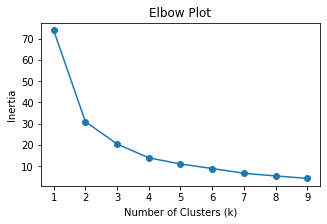

In [54]:
# Perform k-means clustering for different k values
k_values = range(1, 10)  # Range of k values to try
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(5, 3)) 
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

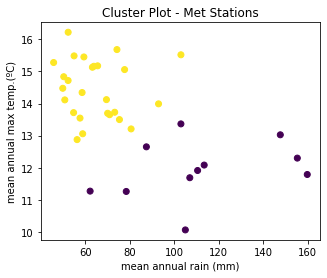

Silhouette Score: 0.5273030292449801


In [55]:
# Scale the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
station_avg['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(5, 4)) 
plt.scatter(X['rain'], X['tmax'], c=station_avg['cluster'])
plt.xlabel('mean annual rain (mm)')
plt.ylabel('mean annual max temp.(ºC)')
plt.title('Cluster Plot - Met Stations')


plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)


In [56]:
station_avg["cluster"]

station
aberporth          1
armagh             1
ballypatrick       0
bradford           1
braemar            0
camborne           1
cambridge          1
cardiff            1
chivenor           1
cwmystwyth         0
dunstaffnage       0
durham             1
eastbourne         1
eskdalemuir        0
heathrow           1
hurn               1
lerwick            0
leuchars           1
lowestoft          1
manston            1
nairn              1
newtonrigg         0
oxford             1
paisley            0
ringway            1
rossonwye          1
shawbury           1
sheffiel           1
southampton        1
stornoway          0
suttonbonington    1
tire               0
valley             1
waddington         1
wickairport        0
witby              1
yeovilton          1
Name: cluster, dtype: int32

After running the clustering algorithm with different combinations of features. The highest silhouette score achieved was 0.527, when usins tmax and rain as features which is a good score but not too hight. Also, the cluster plot did not show the two clusters very well seprated, even with this score all data points seems very scatered. 

At this stage, I add the longitude and latitude to the table with the cluster labels and arranged it by longitude and by latitude. This still did not reveal for me any clear patterns in the clusters.

In [57]:
station_avg["longitude"] = [-4.56999, -6.64866, -6.15336, -1.77234, -3.39635, -5.32656, 0.10196, -3.18728, -4.14743, -3.80198,
    -5.43859, -1.58455, 0.28543, -3.206, -0.44904, -1.83483, -1.18299, -2.86051, 1.72679, 1.33716,
    -3.82097, -2.78644, -1.2625, -4.42966, -2.279, -2.58441, -2.66329, -1.48986, -1.40839, -6.31772,
    -1.25, -6.8796, -4.53524, -0.52173, -0.62411, -3.0884, -2.64148] 
station_avg["latitude"] = [52.13914, 54.35234, 55.18062, 53.81341, 57.00612, 50.21782, 52.24501, 51.48783, 51.08865, 52.35817,
    56.45054, 54.76786, 50.76167, 55.311, 51.47872, 50.7789, 60.13946, 56.37745, 52.48323, 51.34597,
    57.593, 54.6699, 51.76073, 55.8455, 53.356, 51.91075, 52.79433, 53.38101, 50.89822, 58.21382,
    52.8331, 56.49999, 53.25238, 53.17509, 54.48073, 58.45406, 51.00586]
# Print the DataFrame
print(station_avg.head())

                   tmax      tmin        af        rain  cluster  longitude  \
station                                                                       
aberporth     13.209167  7.908333  0.800000   80.655833        1   -4.56999   
armagh        13.697087  6.263478  2.704348   70.110256        1   -6.64866   
ballypatrick  11.912500  6.235000  1.625000  110.550833        0   -6.15336   
bradford      13.500000  6.509167  2.916667   75.424167        1   -1.77234   
braemar       11.259167  3.145833  8.575000   78.473333        0   -3.39635   

              latitude  
station                 
aberporth     52.13914  
armagh        54.35234  
ballypatrick  55.18062  
bradford      53.81341  
braemar       57.00612  


In [58]:
table = pd.DataFrame(station_avg[["cluster", "longitude", "latitude"]]) 

#arrange in descendind longitude
table.sort_values(by='longitude', ascending=False).head(10)


,cluster,longitude,latitude
station,,,
lowestoft,1,1.72679,52.48323
manston,1,1.33716,51.34597
eastbourne,1,0.28543,50.76167
cambridge,1,0.10196,52.24501
heathrow,1,-0.44904,51.47872
waddington,1,-0.52173,53.17509
wickairport,0,-0.62411,54.48073
lerwick,0,-1.18299,60.13946
suttonbonington,1,-1.25000,52.83310


In [59]:
# arrange in descending latitude
table.sort_values(by='latitude', ascending=False).head(10)

,cluster,longitude,latitude
station,,,
lerwick,0,-1.18299,60.13946
witby,1,-3.08840,58.45406
stornoway,0,-6.31772,58.21382
nairn,1,-3.82097,57.59300
braemar,0,-3.39635,57.00612
tire,0,-6.87960,56.49999
dunstaffnage,0,-5.43859,56.45054
leuchars,1,-2.86051,56.37745
paisley,0,-4.42966,55.84550


Finally, I used the folium package to visualize the clusters on a map. This visualization made it clear that one cluster consisted of stations in the southeast of the country with warmer tmax and less rain, while the other cluster consisted of stations in the northwest area with colder tmax and more rain.

In conclusion, despite the moderate silhouette score, the cluster plot and table arrangements did not clearly exhibit well-defined clusters, the geospatial visualization on the UK map makes sense to the cluster found by the k means algorithm  in grouping stations with "similar" weather.

In [ ]:
pip install folium

In [61]:
import folium

map_data = station_avg[['latitude', 'longitude', 'cluster']]

# Create a folium map centered (mean of our data location)
m = folium.Map(location=[map_data['latitude'].mean(), map_data['longitude'].mean()], zoom_start=6)

# Add markers to the map based on the latitude, longitude, and cluster.
for index, row in map_data.iterrows():
    if row['cluster'] == 1:
        color = 'orange'
    else:
        color = 'blue'
    
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Cluster: {row['cluster']}",
                  icon=folium.Icon(icon="cloud", color=color)).add_to(m)

# Display the map
m

<div class="alert alert-block stlye= 'color:white, background color: blue;'>
Workflow by [Inma Ruiz](https://www.inmaruiz.com) 
</div>


<div class="alert alert-block alert-info">
  workflow by Inma Ruiz available at https://github.com/InmaculadaRM
</div>